In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from numpy import sqrt
import pandas as pd
import scipy.constants as const
from scipy.optimize import curve_fit                        # Funktionsfit:     popt, pcov = curve_fit(func, xdata, ydata) 
from uncertainties import ufloat                            # Fehler:           fehlerwert =  ulfaot(x, err)
from uncertainties import unumpy as unp 
from uncertainties.unumpy import uarray                     # Array von Fehler: fehlerarray =  uarray(array, errarray)
from uncertainties.unumpy import (nominal_values as noms,   # Wert:             noms(fehlerwert) = x
                                  std_devs as stds)         # Abweichung:       stds(fehlerarray) = errarray

/tmp/ipykernel_18761/3335457490.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  md_rearranged = np.c_[x[:np.int(np.round(len(x)/2))], counts[:np.int(np.round(len(x)/2))], x[np.int(np.round(len(x)/2)):], counts[np.int(np.round(len(x)/2)):]]
/tmp/ipykernel_18761/3335457490.py:11: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r+" (-> marker='+'). The keyword argument will take precedence.
  plt.plot(x, counts, 'r+', label="Daten", marker='x')


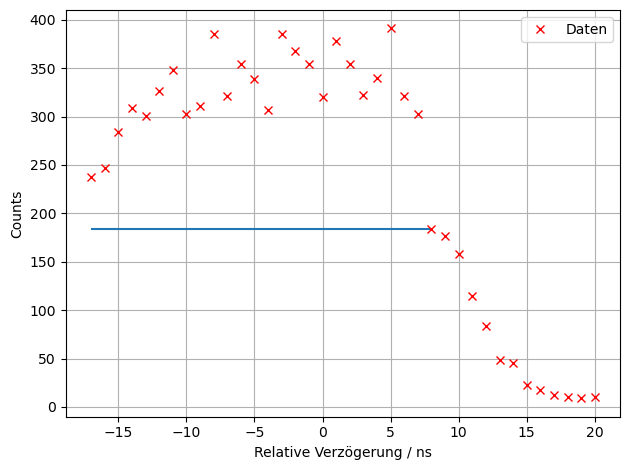

Halbwerstbreite: 25ns


In [2]:
# Tabelle 1:

md = pd.read_csv('tables/20ns_table.csv')
md = md.to_numpy()
x = md[:,0]
counts = md[:,1]
md_rearranged = np.c_[x[:np.int(np.round(len(x)/2))], counts[:np.int(np.round(len(x)/2))], x[np.int(np.round(len(x)/2)):], counts[np.int(np.round(len(x)/2)):]]
# md_rearranged = md.reshape((-1,4))

plt.hlines(md[25,1], md[0,0], md[25,0])
plt.plot(x, counts, 'r+', label="Daten", marker='x')
plt.ylabel('Counts')
plt.xlabel('Relative Verzögerung / ns')
plt.tight_layout()
plt.grid(':')
plt.legend(loc="best")
plt.show()
None
print('Halbwerstbreite: ' + str(md[25,0] - md[0,0]) + 'ns')

/tmp/ipykernel_18761/3835555508.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  md_rearranged = np.c_[x[:np.int(np.round(len(x)/2))], counts[:np.int(np.round(len(x)/2))], x[np.int(np.round(len(x)/2)):], counts[np.int(np.round(len(x)/2)):]]
/tmp/ipykernel_18761/3835555508.py:11: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r+" (-> marker='+'). The keyword argument will take precedence.
  plt.plot(x, counts, 'r+', label="Daten", marker='x')


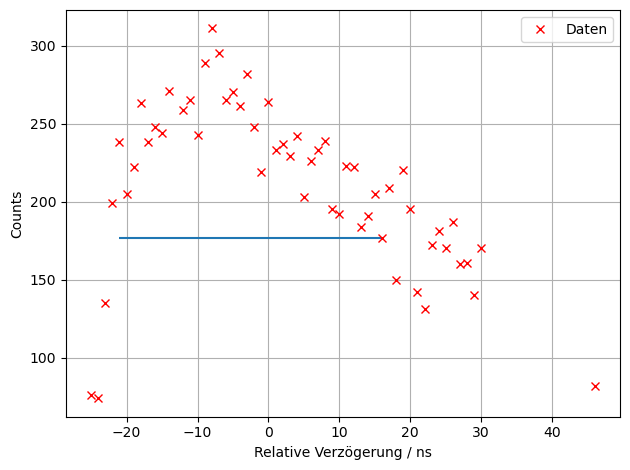

Halbwerstbreite: 37ns


In [3]:
# Tabelle 1:

md = pd.read_csv('tables/30ns_table.csv')
md = md.to_numpy()
x = md[:,0]
counts = md[:,1]
md_rearranged = np.c_[x[:np.int(np.round(len(x)/2))], counts[:np.int(np.round(len(x)/2))], x[np.int(np.round(len(x)/2)):], counts[np.int(np.round(len(x)/2)):]]
# md_rearranged = md.reshape((-1,4))

plt.hlines(md[40,1], md[4,0], md[40,0])
plt.plot(x, counts, 'r+', label="Daten", marker='x')
plt.ylabel('Counts')
plt.xlabel('Relative Verzögerung / ns')
plt.tight_layout()
plt.grid(':')
plt.legend(loc="best")
plt.show()
None
print('Halbwerstbreite: ' + str(md[40,0] - md[4,0]) + 'ns')

Parameter:  [0.02257131 0.14801307] 
Fehler:  [4.50070690e-05 5.99359768e-03]
0.02257+/-0.00005
0.148+/-0.006


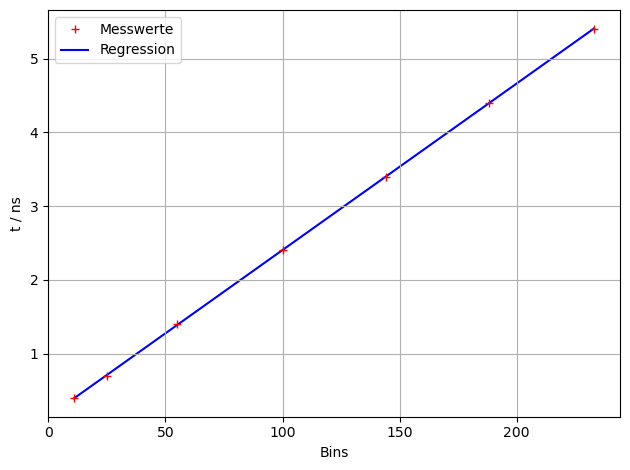

In [4]:
def func(x, m, b):
    return m * x + b

md = pd.read_csv('tables/monoflop.csv')
md = md.to_numpy()

y = md[:,0]
bins = md[:,1]

params, cov = curve_fit(func, bins, y)
print('Parameter: ', params, '\nFehler: ', np.sqrt(np.diag(cov)))

m = ufloat(params[0], np.sqrt(np.diag(cov))[0])
b = ufloat(params[1], np.sqrt(np.diag(cov))[1])

plt.plot(bins, y, 'r+', label="Messwerte",)
plt.plot(bins, func(bins, *params), 'b', label="Regression", zorder=0)
plt.ylabel('t / ns')
plt.xlabel('Bins')
plt.tight_layout()
plt.grid(':')
plt.legend(loc="best")
# plt.show()
print(m)
print(b)

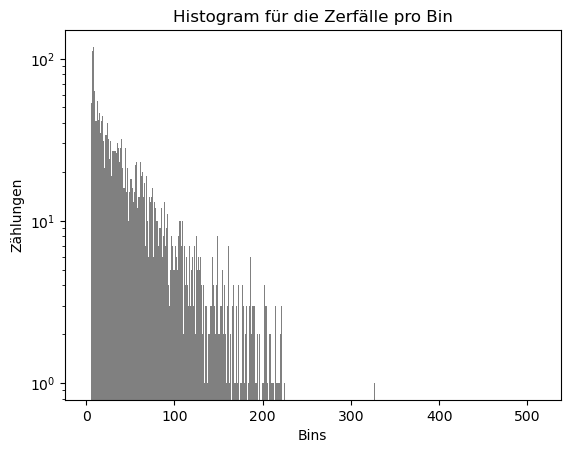

In [5]:
counts=np.genfromtxt('tables/myon_stefan.txt', unpack=True)

# Specify the bin edges
bins = np.linspace(1, 512, 512)

# Specify the bin heights
bin_heights = counts

# Create the histogram using the specified bins and heights
plt.hist(bins, bins=bins, weights=bin_heights, log=True, color='grey')

# Set labels and title
plt.xlabel('Bins')
plt.ylabel('Zählungen')
plt.title('Histogram für die Zerfälle pro Bin')

# Show the plot
plt.show()


1.19+/-0.07


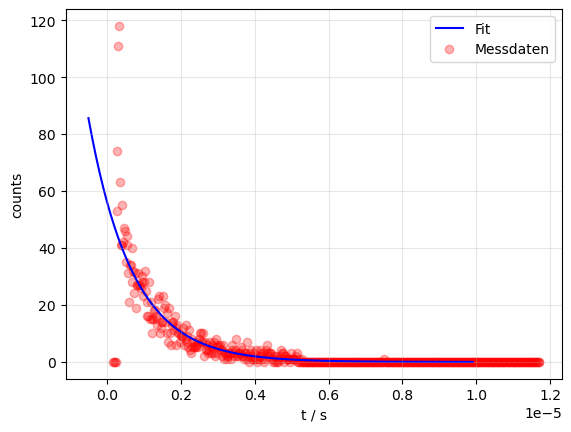

In [6]:
def func2(t, N_0, lam, U):
    return N_0 * np.exp(- lam * t) + U

def func3(bin):                 # Converts bins to time
    return (m.nominal_value * bin + b.nominal_value) * 10**(-6)

# print(m.nominal_value)

params, cov = curve_fit(func2, func3(bins), counts)
N_0 = ufloat(params[0], np.sqrt(np.diag(cov))[0])
lam = ufloat(params[1], np.sqrt(np.diag(cov))[1])
U = ufloat(params[2], np.sqrt(np.diag(cov))[2])

print((1 / lam ) * 10**6)

# print('Parameter: ', params, '\nFehler: ', np.sqrt(np.diag(cov)))

x = np.arange(-0.5 *  10**(-6),10 * 10**(-6),0.1* 10**(-6))
plt.plot(x, func2(x, *params), ls='-', c='b', zorder=1, label='Fit')
plt.plot(func3(bins),counts, 'o', alpha=0.3, c='r', zorder=0, label='Messdaten')
# plt.yscale('log')
plt.xlabel('t / s')
plt.ylabel('counts')
plt.grid('::', alpha=0.3)
plt.legend()
plt.show()

In [35]:
data1 = np.c_[bins[:40], counts[:40], bins[40:80], counts[40:80], bins[80:120], counts[80:120], bins[120:160],counts[120:160]]

data2 = np.c_[bins[160:200], counts[160:200], bins[200:240], counts[200:240], bins[240:280], counts[240:280], bins[280:320],counts[280:320]]

data3 = np.c_[bins[360:398], counts[360:398], bins[398:436], counts[398:436], bins[436:474], counts[436:474], bins[474:513], counts[474:512]]

df = pd.DataFrame(data1)
hea = list(['Bin', 'Counts','Bin', 'Counts','Bin', 'Counts','Bin', 'Counts'])
df_table = df.to_latex(index = False, column_format= "c c c c c c c c", decimal=',', header=hea, label='tab:messdaten_myonen', caption='Messdaten der Lebenszeitmessung der Myonen.')
# with open('build/messdaten_myonen.txt', 'w') as f:
#     f.write(df_table)
print(df_table)

\begin{table}
\centering
\caption{Messdaten der Lebenszeitmessung der Myonen.}
\label{tab:messdaten_myonen}
\begin{tabular}{c c c c c c c c}
\toprule
  Bin & Counts &   Bin & Counts &   Bin & Counts &   Bin & Counts \\
\midrule
361,0 &    0,0 & 399,0 &    0,0 & 437,0 &    0,0 & 475,0 &    0,0 \\
362,0 &    0,0 & 400,0 &    0,0 & 438,0 &    0,0 & 476,0 &    0,0 \\
363,0 &    0,0 & 401,0 &    0,0 & 439,0 &    0,0 & 477,0 &    0,0 \\
364,0 &    0,0 & 402,0 &    0,0 & 440,0 &    0,0 & 478,0 &    0,0 \\
365,0 &    0,0 & 403,0 &    0,0 & 441,0 &    0,0 & 479,0 &    0,0 \\
366,0 &    0,0 & 404,0 &    0,0 & 442,0 &    0,0 & 480,0 &    0,0 \\
367,0 &    0,0 & 405,0 &    0,0 & 443,0 &    0,0 & 481,0 &    0,0 \\
368,0 &    0,0 & 406,0 &    0,0 & 444,0 &    0,0 & 482,0 &    0,0 \\
369,0 &    0,0 & 407,0 &    0,0 & 445,0 &    0,0 & 483,0 &    0,0 \\
370,0 &    0,0 & 408,0 &    0,0 & 446,0 &    0,0 & 484,0 &    0,0 \\
371,0 &    0,0 & 409,0 &    0,0 & 447,0 &    0,0 & 485,0 &    0,0 \\
372,0 &    0,

/tmp/ipykernel_18761/12069269.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_table = df.to_latex(index = False, column_format= "c c c c c c c c", decimal=',', header=hea, label='tab:messdaten_myonen', caption='Messdaten der Lebenszeitmessung der Myonen.')
